In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/Overlap2022_11_30_17_53_13_L15_1',delimiter=',')

z0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/z_2022_11_30_17_53_13_L15_1',delimiter=',')
zz0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/zz_2022_11_30_17_53_13_L15_1',delimiter=',')

In [3]:
tlist = np.array([1.34,1.51,1.68,1.85,2.02,3])+0.6
print(tlist)
crit_id0 = []
for i in range(0,len(tlist)):
    crit_id0.append(np.argmin(abs(data[0]-tlist[i])))
print(crit_id0)

[1.94 2.11 2.28 2.45 2.62 3.6 ]
[146, 149, 153, 156, 159, 178]


[ 0  2  4  6  8 10 12]
[0.5951805960810617, 0.23911029903173364, 0.12968850394768017, 0.10097176593057389, 0.11357865556995173, 0.1633688221552737, 0.26309830556612157]
[0.6142233601073186, 0.2722199291705787, 0.1608011420398372, 0.13022577522047712, 0.13935446557568215, 0.18154298400137725, 0.2930337744124466]
[0.6317930575904223, 0.3034806746090086, 0.20354841858114248, 0.1812994617523021, 0.19709495153241002, 0.24607593086099872, 0.35242153954411715]
[0.6550560030203355, 0.34218806171363986, 0.261560078179685, 0.2523145932092947, 0.27430381971547546, 0.3145905355281846, 0.3999510689290253]
[0.6729198899585291, 0.3737571175331867, 0.29627489416897035, 0.2854111889328379, 0.2996425818207878, 0.33357896052563085, 0.41933170949317605]
[0.9609899480576709, 0.9159378290305376, 0.9016327899689801, 0.8898133800823463, 0.884246877004091, 0.8869111567030044, 0.9030642298542128]


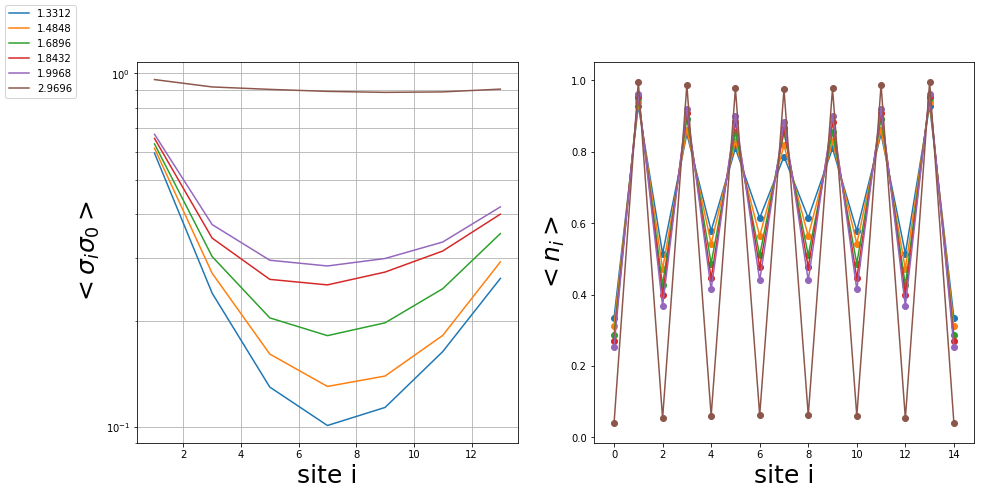

In [4]:
N = 15
center_id = int(N/2)
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
sign = np.ones(N-1)
sign[0::2]=-1
x2 = np.arange(0,N-2,2)
print(x2)

for i in range(len(crit_id0)):
    t_id = crit_id0[i]
    z = z0[t_id]
    zz = zz0[t_id].reshape(N,N)
    n = (1-z)/2
    sigma = (n[0:N-1]-n[1:N])*sign
    nn = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
    x = np.arange(1,N)
    sigma_c = []
    sigma2 = []

    for i in x2:
        temp = ( (-1)**i * (nn[center_id-int(i/2),center_id+int(i/2)]\
                               +nn[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn[center_id-int(i/2),center_id+int(i/2)+1]))
        sigma2.append(temp)
        sigma_c.append(temp-sigma[center_id-int(i/2)]*sigma[center_id+int(i/2)])
    print(sigma2)
  #  ax[0].plot(x2+1,sigma_c,label='evolved state, disconnected part')
    
#     ax[0].scatter(x2+1,sigma_c,label='evolved state, connected part')
    ax[0].plot(x2+1,sigma2,label= str(round(data[0][t_id]-0.6,4)))
    ax[0].set_xlabel('site i',fontsize = 25)
    ax[0].set_ylabel('$<\sigma_i\sigma_0>$',fontsize = 25)
    ax[1].scatter(np.arange(0,N),n)
    ax[1].plot(np.arange(0,N),n)
    ax[1].set_xlabel('site i',fontsize = 25)
    ax[1].set_ylabel('$<n_i>$',fontsize = 25)
ax[0].grid(True,which ='both')    
ax[0].set_yscale('log')

fig.legend(loc ='upper left')
# print('Crit Time '+str(np.round(t[t_id],4))+'us')
# print('Crit Detuning '+str(np.round(data[1][t_id],4))+'MHz')
# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(sigma_c_g))